In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("../Data/pharmacy_tx.csv")
df 

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00
...,...,...,...,...,...,...,...,...,...
13910239,2022-12-30,Pharmacy #42,U27.71,branded colifunene,322463,NaN,HO8HUGL,True,0.00
13910240,2022-12-30,Pharmacy #45,N59.44,generic tafistitrisin,664344,NaN,TFZOR5R49,False,6.28
13910241,2022-12-30,Pharmacy #54,W50.87,generic tanoclolol,691847,N098KI,6SP1DG,False,6.94
13910242,2022-12-30,Pharmacy #0,I68.27,branded prazinib,96934,S76J7V6,NaN,False,13.93


In [3]:
# Splitting the dataframe into X and y with y being the last column and X being all the other columns except the first one and last one

X = df.iloc[:, 2:4]
y = df.iloc[:, -1]

# One hot encoding all the columns of X

X = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


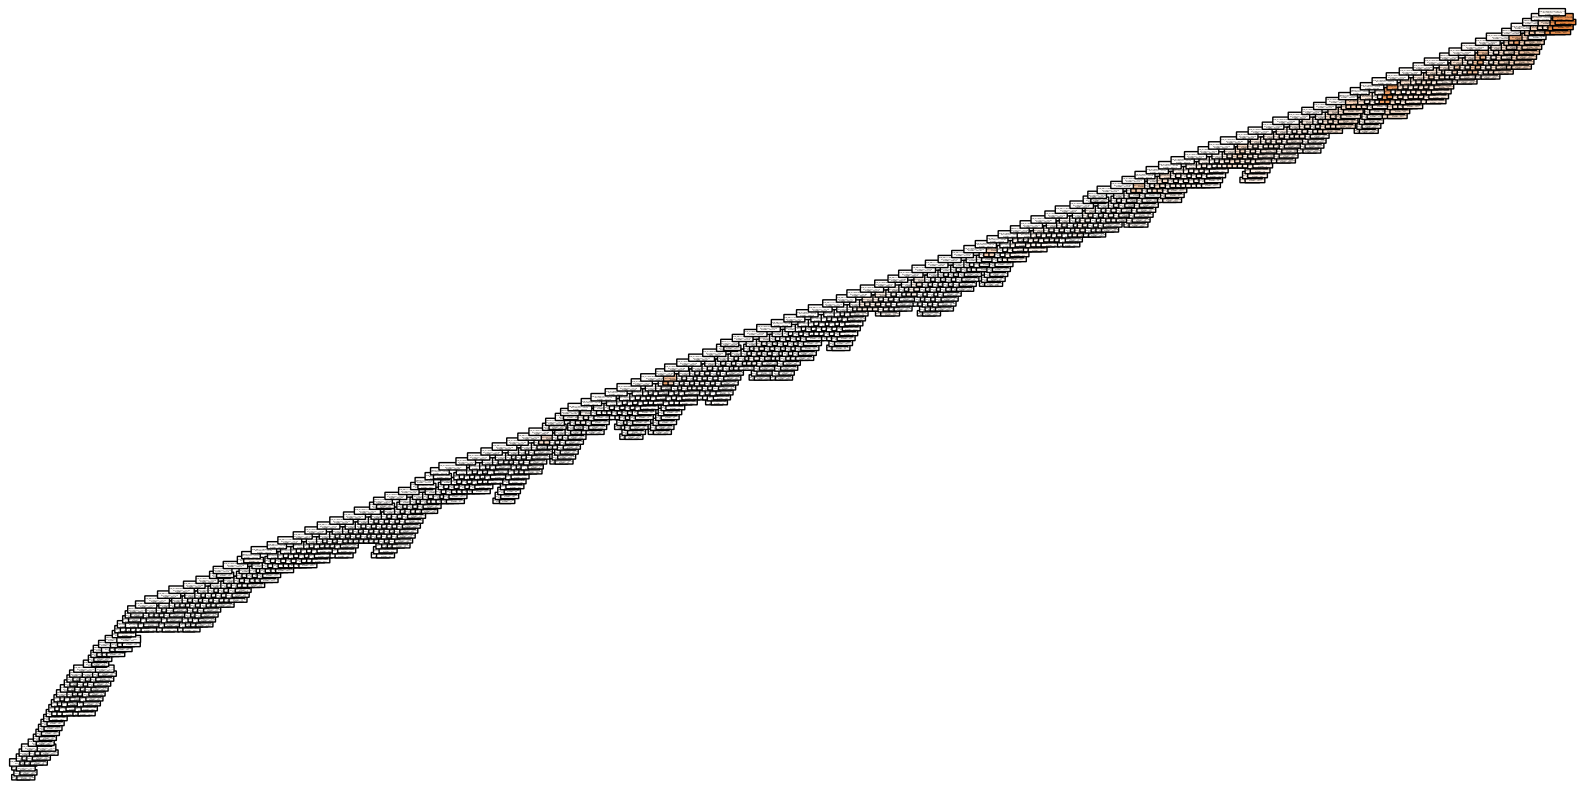

In [4]:
# Creating the decision tree model and fitting it to the training data 

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predicting the values for the testing data

y_pred = model.predict(X_test)

# Visualizing the decision tree

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))

plot_tree(model, feature_names=X.columns, filled=True, rounded=True)

plt.show()



In [12]:
# Calculating the root mean squared error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

29.023188522999703

In [14]:
# Computing the mean of training patient_pay for baseline model

average = np.mean(y_train)
baseline_pred = np.full(len(y_test), average)

In [15]:
# Computing root mean square of differences between baseline and y_test

baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
baseline_rmse



39.6408946313921